# internshala training project 

In [1110]:
# importing libraries

In [1111]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt 
import seaborn as sn
%matplotlib inline

In [1112]:
# loading the data

In [1113]:
test = pd.read_csv("project/test.csv")
train = pd.read_csv("project/train.csv")


In [1114]:
# checking the shape of train and test dataset

In [1115]:
train.shape , test.shape

((79853, 12), (34224, 11))

target column is not present in the test dataset as expected 

In [1116]:
#printing the the first five rows 

In [1117]:
test.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type
0,649,0.001,27384,51150,0.0,0.0,0.0,99.89,7,A,Rural
1,81136,0.124,23735,285140,0.0,0.0,0.0,98.93,19,A,Urban
2,70762,1.000,17170,186030,0.0,0.0,0.0,NaN,2,B,Urban
3,53935,0.198,16068,123540,0.0,0.0,0.0,99.00,11,B,Rural
4,15476,0.041,10591,200020,1.0,0.0,0.0,99.17,14,A,Rural


In [1118]:
train.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,1


In [1119]:
# chekcing the columns in the datasets

In [1120]:
test.columns , train.columns

(Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
        'Count_3-6_months_late', 'Count_6-12_months_late',
        'Count_more_than_12_months_late', 'application_underwriting_score',
        'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type'],
       dtype='object'),
 Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
        'Count_3-6_months_late', 'Count_6-12_months_late',
        'Count_more_than_12_months_late', 'application_underwriting_score',
        'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
        'target'],
       dtype='object'))

In [1121]:
train.dtypes

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
target                                int64
dtype: object

by this we know that all variables except sorucing channel and residence area type are numerical 

# univariate analysis  

In [1122]:
train['target'].value_counts()

1    74855
0     4998
Name: target, dtype: int64

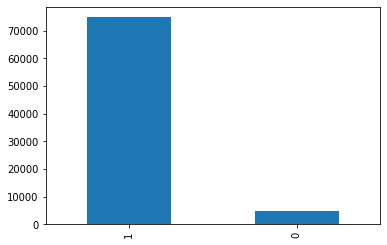

In [1123]:
train['target'].value_counts().plot.bar()

# bivariate analysis 

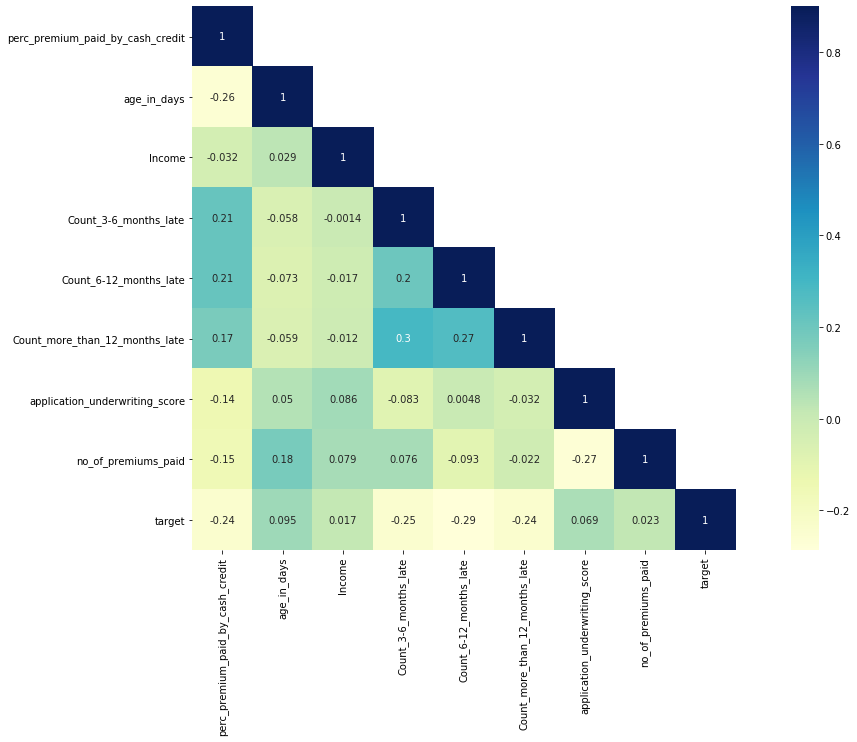

In [1124]:
# looking for the correlation between the numerical variables of train datset

corr = train[["perc_premium_paid_by_cash_credit","age_in_days","Income","Count_3-6_months_late","Count_6-12_months_late",
"Count_more_than_12_months_late","application_underwriting_score","no_of_premiums_paid","target"]].corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

In [1125]:
train = train.drop(['sourcing_channel'],axis=1)

In [1126]:
test = test.drop(['sourcing_channel'],axis=1)

# model building 

In [1127]:
train = pd.get_dummies(train)
train.shape


(79853, 12)

In [1128]:
test = pd.get_dummies(test)
test.shape

(34224, 11)

In [1129]:
test = test.fillna(0.0)

In [1130]:
train = train.fillna(0.0)

In [1131]:
train['perc_premium_paid_by_cash_credit'].mean()

0.31428774122450603

In [1132]:
training = train[train['perc_premium_paid_by_cash_credit']<=0.31428]
validation = train[train['perc_premium_paid_by_cash_credit']>0.31428]

In [1133]:
training = pd.get_dummies(training)
training.shape

(49849, 12)

In [1134]:
validation = pd.get_dummies(validation)
validation.shape

(30004, 12)

In [1135]:
from sklearn.linear_model import LogisticRegression

In [1136]:
x_train = train.drop('target',axis=1)
y_train = train['target']
x_val = validation.drop('target',axis=1)
y_val = validation['target']

In [1137]:
x_train.shape , y_train.shape , x_val.shape , y_val.shape

((79853, 11), (79853,), (30004, 11), (30004,))

In [1138]:
logreg = LogisticRegression(max_iter=10000)

In [1139]:
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [1140]:
pred = logreg.predict(x_val)

In [1141]:
pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

# decision trees 

In [1142]:
from sklearn.tree import DecisionTreeRegressor

In [1143]:
# defining a decision tree model with a depth of 5. You can further tune the hyperparameters to improve the score
dt_reg = DecisionTreeRegressor(max_depth=10,min_samples_leaf=10)

Let's fit the decision tree model now.

In [1144]:
dt_reg.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [1145]:
predict = dt_reg.predict(x_val)

In [1146]:
predict

array([0.96992949, 0.32835821, 0.75991189, ..., 0.96      , 0.96992949,
       0.96      ])

In [1167]:
dt_reg1 = DecisionTreeRegressor(max_depth = 17,min_samples_leaf=10)


In [1168]:
dt_reg1.fit(x_val,y_val)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=17,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [1169]:
predict1= dt_reg1.predict(test)

In [1170]:
predict1

array([1.        , 0.99652778, 0.2       , ..., 0.96661829, 0.6       ,
       0.66666667])

# making the predicitions into a file for submission 

In [1151]:
submission2 = pd.DataFrame()

In [1152]:
submission2['id']=test['id']

In [1153]:
submission2['target']=predict1

In [1154]:
submission2.to_csv('submisson2.csv',header=True,index=False)